# -*- coding: utf-8 -*-
"""
Created on Sun Jun 11 13:51:04 2023

@author: MaryamHashemi
"""

In [40]:
import numpy as np
import cv2

# %%
############################### 3.1 Exercise #####################################

############################ 3.1.1 ####################################

# Reading RGB image
img1 = cv2.imread("parrots.jpg")

cv2.imshow("Original image", img1)
print(img1)
print(img1.shape)

img1_red = img1.copy()
# means "select all rows, all columns, and the 3rd channel
# (which is the red channel)
img1_red[:, :, 2] = 255
cv2.imshow("Original image in red", img1_red)


cv2.waitKey(0)
cv2.destroyAllWindows()

[[[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [  0   4   1]
  [ 20   0   1]
  [  5   0   2]]

 [[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [  0  12   6]
  [ 11   0   0]
  [  3   2   4]]

 [[254 254 254]
  [252 252 252]
  [250 250 250]
  ...
  [ 31  83  76]
  [ 13  12  14]
  [  0   1   1]]

 ...

 [[241 241 241]
  [233 233 233]
  [220 220 220]
  ...
  [251 251 251]
  [255 255 255]
  [252 252 252]]

 [[244 244 244]
  [239 239 239]
  [231 231 231]
  ...
  [250 250 250]
  [252 252 252]
  [254 254 254]]

 [[249 249 249]
  [245 245 245]
  [239 239 239]
  ...
  [253 253 253]
  [255 255 255]
  [255 255 255]]]
(490, 980, 3)


In [41]:
# 3.1.2 ####################################
# Reading grey-scale image
img2 = cv2.imread("parrots.jpg", 0)
cv2.imshow("Gray-scale image", img2)
print(img2)
print(img2.shape)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[255 255 254 ...   2   1   1]
 [255 254 253 ...   7   0   3]
 [254 252 250 ...  75  13   1]
 ...
 [241 233 220 ... 251 255 252]
 [244 239 231 ... 250 252 254]
 [249 245 239 ... 253 255 255]]
(490, 980)


In [42]:
############################ 3.1.3 ####################################

cv2.imwrite("parrots_gray_test.jpg", img2)

True

In [43]:
############################ 3.1.4 ####################################

# img1 = cv2.imread('parrots.jpg')

height = img1.shape[0]
width = img1.shape[1]
print(height, width)

test = img1.copy()

# Making frame
# selects the first 75 rows of all columns.
# = 255 sets all pixel values in this region to 255
# (white for an 8-bit image).
# This creates a horizontal white stripe at the top of the image.
test[:75, :] = 255

# selects all rows of the first 75 columns.
test[:, :75] = 255
test[height - 75 :, :] = 255
test[:, width - 75 :] = 255

cv2.imshow("Frame test", test)
cv2.imwrite("parrots_frame_test.jpg", test)

cv2.waitKey(0)
cv2.destroyAllWindows()

490 980


In [44]:
############################ 3.1.5 ####################################

noise = np.random.random((height, width))
noise = noise * 50
noise = noise.astype(int)
print(noise)

cv2.imwrite("noise.jpg", noise)
noise = cv2.imread("noise.jpg", 0)
cv2.imshow("Noise", noise)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[11 46 45 ...  6 28 10]
 [ 8 40 20 ... 24  9 46]
 [33  8  9 ... 40  2 44]
 ...
 [17  1 11 ... 27  4 40]
 [16 37 15 ... 23 28 14]
 [15 41 26 ... 30 18  9]]


In [45]:
############################ 3.1.6 ####################################

noiseimg = noise + img2
result = cv2.imshow("Image noisy", noiseimg)
cv2.imwrite("parrots_noisy_test.jpg", noiseimg)

cv2.waitKey(0)
cv2.destroyAllWindows()


# -*- coding: utf-8 -*-
"""
Created on Sun Jun 11 13:51:04 2023

@author: MaryamHashemi
"""
############################### 3.2 Exercise #####################################


In [46]:

############################ 3.2.1 ####################################
def mean_filter(image):
    height = image.shape[0]
    width = image.shape[1]
    img = image.copy()
    for i in range(height):
        for j in range(width):
            if i > 1 and j > 1 and i < height - 1 and j < width - 1:
                a = image[i - 1, j - 1] / 8
                b = image[i, j - 1] / 8
                c = image[i - 1, j] / 8
                d = image[i, j + 1] / 8
                e = image[i + 1, j] / 8
                f = image[i + 1, j + 1] / 8
                g = image[i + 1, j - 1] / 8
                h = image[i - 1, j + 1] / 8
                n = a + b + c + d + e + f + g + h
                #           print(img1[i-1,j-1],img1[i,j-1])
                img[i, j] = int(n)

    return cv2.imshow("Filtered image (mean)", img)


############################ 3.2.2 ####################################
def median_filter(image):
    height = image.shape[0]
    width = image.shape[1]
    img_prime = image.copy()
    for i in range(height):
        for j in range(width):
            if i > 1 and j > 1 and i < height - 1 and j < width - 1:
                a = [
                    image[i, j],
                    image[i + 1, j + 1],
                    image[i - 1, j - 1],
                    image[i, j + 1],
                    image[i + 1, j],
                    image[i - 1, j],
                    image[i + 1, j - 1],
                    image[i - 1, j + 1],
                    image[i, j - 1],
                ]
                img_prime[i, j] = np.median(a)

    return cv2.imshow("filtered image (median)", img_prime)



In [47]:
img1 = cv2.imread("parrots.jpg", 0)
cv2.imshow("Gray-scale image", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:

img2 = cv2.imread("parrots_noisy_test.jpg", 0)
cv2.imshow("Image noisy", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [49]:
mean_filter(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
median_filter(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
############################ 3.2.3 ####################################
window = 3

# Apply the mean filter
ksize = (window, window)  # Size of the filter kernel
opencv_mean_image = cv2.blur(img2, ksize)


# Apply the median filter
ksize = window  # Size of the filter kernel (window size)
opencv_median_image = cv2.medianBlur(img2, ksize)

cv2.imshow("OpenCV filtered image (mean)", opencv_mean_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
cv2.imshow("OpenCV filtered image (median)", opencv_median_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# -*- coding: utf-8 -*-
"""
Created on Sun Jun 11 13:51:04 2023

@author: MaryamHashemi
"""
############################### 4.1 Exercise #####################################

In [53]:
############################ 4.1.1 ####################################

# captures all the frames
video = cv2.VideoCapture("tom_and_jerry.mp4")

# Check if video opened successfully
if video.isOpened() == False:
    print("Error opening video stream or file")

# fram/sec in video and duration of it
fps = video.get(cv2.CAP_PROP_FPS)
print("frames per second =", fps)

# total number of frames
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print("total number of frames =", length)
print("duration of the video (in sec) =", length / fps)

video.set(cv2.CAP_PROP_POS_FRAMES, 1002)
# "ret" indicates whether the frame was successfully captured or not.
ret, frame = video.read()
cv2.imshow("Frame 1002", frame)

cv2.waitKey(0)
cv2.destroyAllWindows()

frames per second = 25.0
total number of frames = 3646
duration of the video (in sec) = 145.84


In [54]:
############################ 4.1.2 ####################################

# Read until video is completed
while video.isOpened():
    # Capture frame-by-frame
    ret, frame = video.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow("Original video", frame)

        # framegray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        # 100 and 200 are lower and upper threshold
        framegray = cv2.Canny(frame, 100, 200)
        cv2.imshow("Filtered video", framegray)

        if (
            cv2.waitKey(1) == 27
        ):  # wait for ESC key to exit, 27 is the escape key number
            break

    # Break the loop
    else:
        break

# When everything done, release the video capture object
video.release()

# Closes all the frames
cv2.destroyAllWindows()

# -*- coding: utf-8 -*-
"""
Created on Sun Jun 11 13:51:04 2023

@author: Maryam Hashemi
"""
############################### 5.1 Exercise #####################################

In [16]:
############################ 5.1.2 ####################################

# %%
# import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# import cv2


# %%
## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()


## MNIST dataset images are 28*28, and they are between 0-255.
# Preprocessing part 1
train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

## Transforming labels
# Neural networks, especially those using categorical cross-entropy loss, require the labels to be in a one-hot encoded
# format rather than as single integers. One-hot encoding converts the integer labels into binary vectors. 
# Each vector has a length equal to the number of classes, and all elements are 0 except for the position corresponding to the label, which is 1.
# What Happens?
# For a label like 3, to_categorical will transform it from an integer to a one-hot encoded vector like [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
# For a label like 7, to_categorical will transform it to [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

c:\anaconda\envs\opencv_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [17]:
############################ 5.1.3 ####################################

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# VGG16: This is a pre-trained model from the Keras applications module. VGG16 is a deep convolutional neural network originally trained on the ImageNet dataset.
# weights="imagenet": This parameter specifies that the model should load weights that were pre-trained on the ImageNet dataset, a large dataset used for image classification.
# include_top=False: This parameter excludes the fully connected layers (the top of the network) which are responsible for the classification task in the original VGG16 model.
# By setting this to False, only the convolutional base of the VGG16 model is loaded.
# input_shape=(32, 32, 3): This defines the shape of the input images. In this case, the images are 32x32 pixels with 3 color channels (RGB).
# base_model.trainable = False: This freezes the weights of the pre-trained model so they won't be updated during training.
# This is useful when you want to use the pre-trained features without modifying them, which can save time and prevent overfitting, especially when you have a small dataset.

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  ## Not trainable weights

## Preprocessing part 2
train_ds = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds, -1))
train_ds = tf.image.resize(train_ds, (32, 32))
# preprocess_input(train_ds): This function applies the preprocessing steps specific to the VGG16 model.
# It adjusts the pixel values to the format that the model was trained on, including scaling the input pixels.
train_ds = preprocess_input(train_ds)

test_ds = tf.image.grayscale_to_rgb(tf.expand_dims(test_ds, -1))
test_ds = tf.image.resize(test_ds, (32, 32))
test_ds = preprocess_input(test_ds)


In [18]:
############################ 5.1.4 ####################################

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [19]:
############################ 5.1.5 ####################################

from tensorflow.keras import layers, models

# Purpose: The Flatten layer is used to convert a multi-dimensional input tensor into a one-dimensional tensor.
flatten_layer = layers.Flatten()
# The Dense layer (also known as a fully connected layer) is a core layer in neural networks where each input node is connected to each output node.
# 50: The number of neurons in this layer.
dense_layer_1 = layers.Dense(50, activation="relu")
dense_layer_2 = layers.Dense(20, activation="relu")
# 10: The number of neurons in this layer, which corresponds to the number of classes in the classification task.
# For example, in a digit classification task (like MNIST), there are 10 classes (digits 0 through 9).
# activation="softmax": The activation function used is Softmax. Softmax converts the outputs into a probability distribution, where the sum of all probabilities is 1.
# Each neuron output represents the probability of the input belonging to a particular class.
prediction_layer = layers.Dense(10, activation="softmax")

model = models.Sequential(
    [base_model, flatten_layer, dense_layer_1, dense_layer_2, prediction_layer]
)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

es = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True
)

start = datetime.datetime.now()

history = model.fit(
    train_ds,
    train_labels,
    epochs=5,
    validation_split=0.2,
    batch_size=32,
    callbacks=[es],
)

score = model.evaluate(test_ds, test_labels, batch_size=32)
x_valid_output_images = model.predict(test_ds)

# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 146s 96ms/step - accuracy: 0.2699 - loss: 2.1086 - val_accuracy: 0.5337 - val_loss: 1.3050
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 138s 92ms/step - accuracy: 0.5625 - loss: 1.2614 - val_accuracy: 0.6304 - val_loss: 1.0874
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 135s 90ms/step - accuracy: 0.6201 - loss: 1.1014 - val_accuracy: 0.6813 - val_loss: 0.9565
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 127s 85ms/step - accuracy: 0.6588 - loss: 1.0055 - val_accuracy: 0.7129 - val_loss: 0.8795
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 129s 86ms/step - accuracy: 0.6942 - loss: 0.9096 - val_accuracy: 0.6876 - val_loss: 0.9121
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.6831 - loss: 0.9336
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step


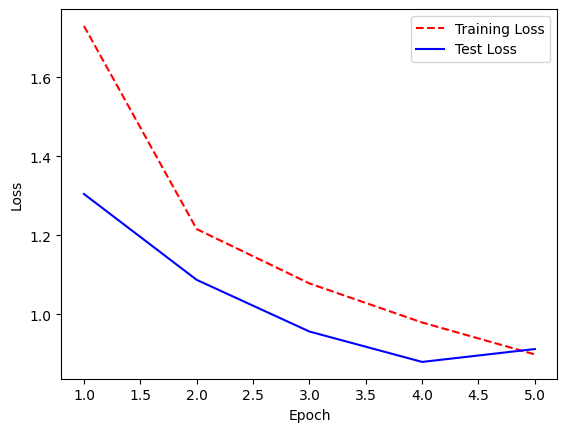

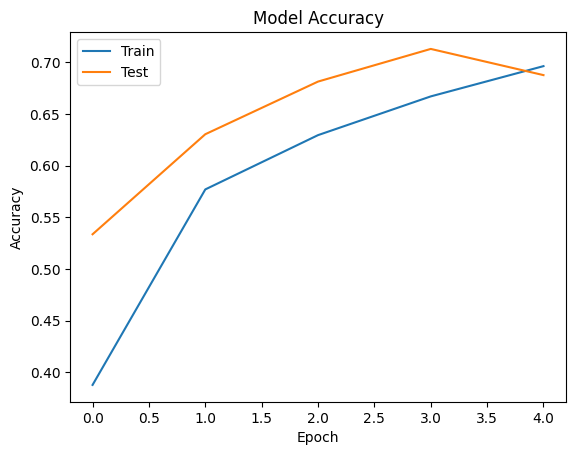

Training time: 0:15:42.111534
Test score: 0.8624573349952698
Test accuracy: 0.7139999866485596


In [20]:
############################ 5.1.6 ####################################

# Visualize loss history
plt.plot(epoch_count, history.history["loss"], "r--")
plt.plot(epoch_count, history.history["val_loss"], "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

end = datetime.datetime.now()
elapsed = end - start
print("Training time:", str(elapsed))
print("Test score:", score[0])
print("Test accuracy:", score[1])

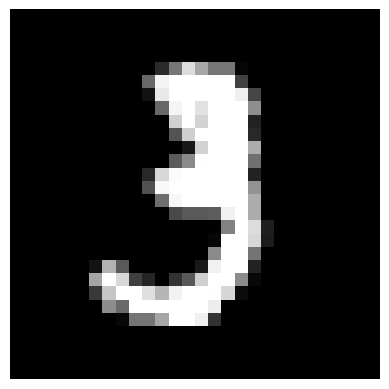

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Actual class: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted class: 3


In [22]:
############################ 5.1.7 ####################################


## Loading MNIST dataset
(train_ds, train_labels), (test_ds, test_labels) = tf.keras.datasets.mnist.load_data()

## Displaying an image
image_index = 10
plt.imshow(train_ds[image_index], cmap="gray")
plt.axis("off")
plt.show()

## Rescaling images
train_ds = train_ds / 255.0
test_ds = test_ds / 255.0

## Remaining code for model training and evaluation
# (Please copy the code provided in the previous response here)

# Use the image for prediction
input_image = tf.image.grayscale_to_rgb(tf.expand_dims(train_ds[image_index], -1))
input_image = tf.image.resize(input_image, (32, 32))
input_image = preprocess_input(input_image)
input_image = tf.expand_dims(input_image, axis=0)


## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

predicted_label = model.predict(input_image)
predicted_class = tf.argmax(predicted_label, axis=1).numpy()[0]

actual_class = train_labels[image_index]

print("Actual class:", actual_class)
print("Predicted class:", predicted_class)